In [0]:
#! pip install torch torchvision
import torch 
from mandelbrot import NeuralModel, train_model, FCModel
from data_processor import train_set, test_set
import matplotlib.pyplot as plt 
import numpy as np 
import torch.nn as nn 

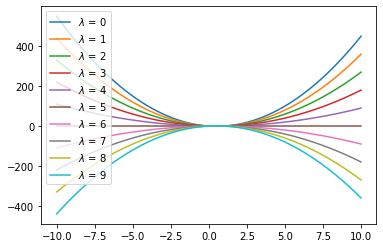

In [2]:

output = [[lmbda*x*(1-x) for x in np.linspace(-10,10, 100)] for lmbda in range(-5, 5)]
for i, z in enumerate(output):
    plt.plot(np.linspace(-10,10, 100),z, label = '$\lambda$ = '+str(i))

plt.legend()
#plt.savefig("image.png", dpi=250)
plt.show()

In [0]:
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

batch_size = 512
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

In [4]:
custom_neural_model = NeuralModel(custom = True)
custom_trained_model, loss_trace = train_model(custom_neural_model, train_loader, epochs = 20)

regular_neural_model = NeuralModel(custom = False)
regular_trained_model, regular_loss_trace = train_model(regular_neural_model, train_loader, epochs = 20)


started training ...
the loss after processing this epoch is:  269.7554385662079
the loss after processing this epoch is:  184.40521252155304


KeyboardInterrupt: ignored

In [0]:
plt.plot(loss_trace, label = 'Mandelbrot')
plt.plot(regular_loss_trace, label = 'ReLU')

plt.legend()
plt.savefig("result.png", dpi=200)
plt.show() 

In [0]:
def test_model(model, test_data):
    model.eval()
    model.to(device)
    correct = 0

    for batch in test_data:
        batch_images, batch_labels = batch
        
        batch_images = batch_images.to(device)
        batch_labels = batch_labels.to(device)

        predictions = model(batch_images)

        predictions = predictions.data.max(1, keepdim=True)[1]
        correct += predictions.eq(batch_labels.data.view_as(predictions)).sum()

    accuracy = float(correct.item() / len(test_loader.dataset))

    print("The classifier accuracy is: ", 100 * accuracy)
    
    return accuracy

In [0]:
test_model(custom_neural_model, test_loader)
test_model(regular_neural_model, test_loader)